In [124]:
## import data
import pandas as pd



In [203]:
df_input = pd.read_csv (r'outfit_objects_data.csv')
print (df_input)

       Farbe       Preis                        Material Structure1  \
0       grau   59,90 EUR        "Obermaterial: 40% Wolle     Frauen   
1       grau         NaN        "Obermaterial: 40% Wolle     Frauen   
2       grau   49,90 EUR    "Obermaterial: 65% Baumwolle     Frauen   
3       Blau         NaN  "Obermaterial: 100% Baumwolle"     Frauen   
4    schwarz   29,90 EUR    "Obermaterial: 97% Baumwolle     Frauen   
..       ...         ...                             ...        ...   
276     gelb  130,00 EUR           "Obermaterial:  Latex     Frauen   
277  schwarz         NaN  "Obermaterial: 100% Polyester"     Frauen   
278      NaN         NaN    "Obermaterial: 95% Baumwolle     Frauen   
279      NaN         NaN    "Obermaterial: 90% Polyester     Frauen   
280  schwarz  219,00 EUR          "Obermaterial:  Leder"     Männer   

    Structure_2      Structure_3        Structure_4  \
0    Bekleidung     Große Größen  Pullover & Strick   
1    Bekleidung     Große Größen     

In [204]:
### clean Material
Material_list = df_input['Material'].tolist()
new_material_list = []
for each_material in Material_list:
    new_material = each_material.split(": ")[1][:-1]
    new_material_list.append(new_material)


In [205]:
## build new dataframe
Farbe_list = df_input['Farbe'].tolist()
data_frame = pd.DataFrame({"Farbe": Farbe_list, "Material":new_material_list})

In [206]:
data_frame.describe()

,Farbe,Material
count,124,281
unique,32,65
top,weiß,100% Baumwolle
freq,17,37


In [129]:
## onehot encoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [130]:
 
 
cat_data = Farbe_list
 
 
label = LabelEncoder()
int_data = label.fit_transform(cat_data)
int_data = int_data.reshape(len(int_data), 1)
 
onehot_data = OneHotEncoder(sparse=False)
onehot_data_farbe = onehot_data.fit_transform(int_data)
print("Categorical data encoded into integer values....\n")
print(onehot_data_farbe)

Categorical data encoded into integer values....

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [131]:
len(onehot_data_farbe[1])

33

In [132]:
 
 
cat_data = new_material_list
 
label = LabelEncoder()
int_data = label.fit_transform(cat_data)
int_data = int_data.reshape(len(int_data), 1)
 
onehot_data = OneHotEncoder(sparse=False)
onehot_data_material = onehot_data.fit_transform(int_data)
print("Categorical data encoded into integer values....\n")
print(onehot_data_material)

Categorical data encoded into integer values....

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [133]:
len(onehot_data_material[1])

65

In [134]:
df_encoded = pd.DataFrame(onehot_data_material)


In [135]:
df_encoded.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [160]:
## combine data
final_data = []
len_data = len(onehot_data_material)
for i in range(0,(len_data)):
    this_data = onehot_data_farbe[i].tolist()
    this_data.extend(onehot_data_material[i].tolist())
    final_data.append(this_data)

In [161]:
len(final_data[1])

98

In [162]:
len(final_data)

281

In [163]:
from sklearn.manifold import TSNE

In [164]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
tsne_output = tsne.fit_transform(final_data )

c:\users\sangmeng li\pycharmprojects\webcrawer\venv\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\users\sangmeng li\pycharmprojects\webcrawer\venv\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 281 samples in 0.000s...
[t-SNE] Computed neighbors for 281 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 281 / 281
[t-SNE] Mean sigma: 0.594651
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.870792
[t-SNE] KL divergence after 1000 iterations: 0.487938


In [177]:
len(tsne_output)

281

In [166]:
import seaborn as sns

[Text(0.5, 1.0, 'Iris data T-SNE projection')]

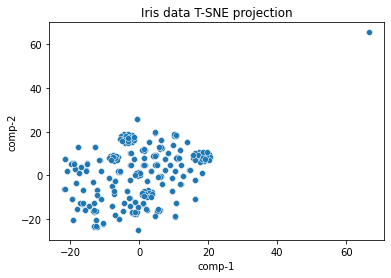

In [179]:
df = pd.DataFrame()
#df["y"] = y
df["comp-1"] = tsne_output[:,0]
df["comp-2"] = tsne_output[:,1]

sns.scatterplot(x="comp-1", y="comp-2", 
                #hue=df.y.tolist(),
                #palette=sns.color_palette("hls", 3),
                data=df).set(title="Iris data T-SNE projection") 

In [180]:
df.shape

(281, 2)

In [181]:
tsne_output_list = tsne_output.tolist()

In [186]:
#### Clusteirng:
from sklearn.cluster import KMeans


In [248]:
kmeans = KMeans(n_clusters=7).fit(df_encoded)

In [238]:
df_encoded.shape

(281, 65)

In [239]:
df.shape

(281, 3)

In [240]:
import matplotlib.pyplot as plt

In [249]:
df['Clusters'] = kmeans.labels_.astype(float)

<AxesSubplot:xlabel='comp-1', ylabel='comp-2'>

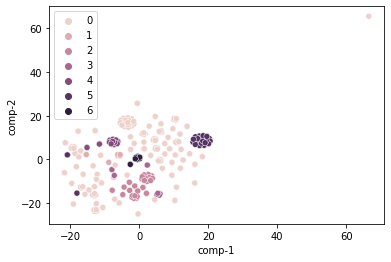

In [250]:
#plt.scatter(df['comp-1'], df['comp-2'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
#plt.show()
sns.scatterplot(data=df, x="comp-1", y="comp-2", hue=kmeans.labels_)

In [255]:
result_array = kmeans.labels_.astype(float) == 2
res = [i for i, val in enumerate(result_array) if val]

In [257]:
df_input.iloc[res].describe()

,Farbe,Preis,Material,Structure1,Structure_2,Structure_3,Structure_4,outfit_id,object_id
count,24,20,37,37,37,37,37,37,37
unique,10,6,3,2,2,8,12,14,19
top,creme,"59,90 EUR","""Obermaterial: 100% Baumwolle""",Frauen,Bekleidung,Große Größen,Hosen,/o/lena-gercke-cozy-off-white-sweat-look-by-le...,/p/leger-by-lena-gercke/jeans-lorin-4022024
freq,6,8,18,33,35,11,6,4,2


In [258]:
df_input.iloc[res]

,Farbe,Preis,Material,Structure1,Structure_2,Structure_3,Structure_4,outfit_id,object_id
3,Blau,NaN,"""Obermaterial: 100% Baumwolle""",Frauen,Bekleidung,Jeans,Straight Leg,/o/lena-gercke-easy-basic-look-by-leger-by-len...,/p/leger-by-lena-gercke/jeans-lorin-4022024
10,creme,NaN,"""Obermaterial: 100% Baumwolle""",Frauen,Bekleidung,Shirts & Tops,Shirts,/o/lena-gercke-cozy-off-white-sweat-look-by-le...,/p/leger-by-lena-gercke/shirt-eliza-6570120
11,creme,"34,90 EUR","""Obermaterial: 100% Baumwolle""",Frauen,Bekleidung,Große Größen,Hosen,/o/lena-gercke-cozy-off-white-sweat-look-by-le...,/p/leger-by-lena-gercke/shorts-eliane-6551782
13,hellblau,"59,90 EUR","""Obermaterial: 100% Baumwolle""",Frauen,Bekleidung,Jeans,Boyfriend,/o/lena-gercke-simple-cropped-look-by-leger-by...,/p/leger-by-lena-gercke/jeans-line-5907163
19,creme,"59,90 EUR","""Material: 100% Baumwolle""",Frauen,Bekleidung,Sweat,Sweatshirts,/o/lena-meyer-landrut-striped-comfy-look-by-a-...,/p/a-lot-less/sweatshirt-carla-7841736
30,naturweiß,"59,90 EUR","""Material: 100% Baumwolle""",Frauen,Bekleidung,Sweat,Sweatshirts,/o/lena-meyer-landrut-comfy-off-white-twinset-...,/p/a-lot-less/sweatshirt-haven-gots-6791907
31,offwhite,NaN,"""Material: 100% Baumwolle""",Frauen,Bekleidung,Große Größen,Hosen,/o/lena-meyer-landrut-comfy-off-white-twinset-...,/p/a-lot-less/hose-ida-gots-6792216
34,grün,NaN,"""Obermaterial: 100% Baumwolle""",Frauen,Bekleidung,Pullover & Strick,Strick,/o/lena-meyer-landrut-simple-comfy-look-by-a-l...,/p/a-lot-less/cardigan-leanna-7787330
39,silber,"69,90 EUR","""Material: 100% Baumwolle""",Männer,Bekleidung,Hemden,Business Hemden,/o/stefanie-giesinger-casual-business-look-18777,/p/hugo/hemd-elisha02-7318095
40,blau,"79,99 EUR","""Zusammensetzung: 100% Baumwolle""",Männer,Bekleidung,Hemden,Business Hemden,/o/stefanie-giesinger-casual-business-look-18777,/p/eterna/hemd-7607138
